## 导入库

In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt

## 导入数据

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    datMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        datMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return datMat,labelMat

## 标准回归函数
    Ws = (X.T * X).I * X.T * Y

In [3]:
def standRegres(xArr, yArr):
    xMat = mat(xArr);yMat = mat(yArr).T
    xTx = xMat.T * xMat
    
    if linalg.det(xTx) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return
    ws = xTx.I * xMat.T * yMat
    return ws

In [4]:
xArr, yArr = loadDataSet('data/ex0.txt')
#print(xArr[0:2])
ws = standRegres(xArr,yArr)
print(ws)

[[3.00774324]
 [1.69532264]]


## 绘制数据散点图和最佳拟合直线

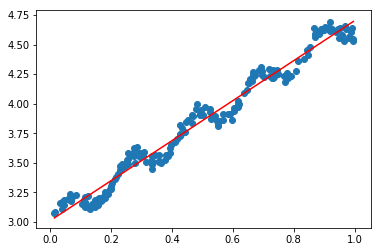

In [16]:
def plotfit(xArr, yArr, ws, yHat):
    xMat = mat(xArr); yMat = mat(yArr).T
   
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xMat[:,1].tolist(), yMat.tolist())
    
    x1 = xMat.copy()
    x1.sort(0)
    yHat = x1 * ws
    ax.plot(x1[:,1],yHat,'red')
    
plotfit(xArr,yArr,ws)

## 计算相关系数：计算预测值与真实值之间的匹配程度

In [8]:
xMat = mat(xArr); yMat = mat(yArr).T
yHat = xMat * ws
corrcoef(yMat.T,yHat.T)                  # 相关系数计算必须抱枕两个向量都是行向量

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

## 局部加权线性回归
    Ws = (X.T * W * X).I * X.T * W * y
    W 为高斯核：exp(-(xi-x)^2/(2*k^2))

In [53]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye(m))
    
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0 * k ** 2))
    xTx = xMat.T * weights * xMat
    
    if linalg.det(xTx) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return
    ws = xTx.I * xMat.T * weights * yMat
    #print(ws)
    return testPoint * ws   
        

In [54]:
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr,k)
    return yHat

In [66]:
xArr, yArr = loadDataSet('data/ex0.txt')
yHat = lwlrTest(xArr, xArr, yArr, 0.01)

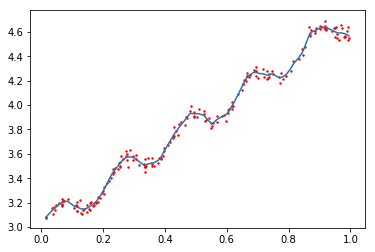

In [67]:
srtInd = xMat[:,1].argsort(0)                 #对 xMat 沿第二列进行排序，返回索引值
xsort = xMat[srtInd][:,0,:]     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].tolist(),mat(yArr).T.tolist(),s=2,c='red')
ax.plot(xsort[:,1],yHat[srtInd])


# 预测鲍鱼的年龄

In [68]:
def rssError(yArr, yHatArr):
    return ((yArr-yHatArr)**2).sum()

In [71]:
abX, abY = loadDataSet('data/abalone.txt')
yHat = lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
rssError(abY[0:99],yHat.T)

56.81549669032892

# 用于处理特征比样本点还多的情况
## 岭回归：
    * 岭回归：在矩阵 X.T*X 上加上一个 lambda*I 从而使得矩阵非奇异,进而可以求逆
        w = (X.T*X + lambda*I).I * X.T * y     通过引入惩罚项lambda来限制所有w的和，减少不必要的参数
        在增加约束条件：sum(pow(Wi,2))<=lambda ，普通的最小二乘法会得到与岭回归一样的公式 

In [72]:
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T * xMat
    demon = xTx + eye(shape(xMat)[1])*lam
    if linalg.det(demon) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return
    ws = demon * xMat.T * yMat
    return ws

In [73]:
def ridgeTest(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat-yMean
    
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)
    xMat = (xMat-xMeans) / xVar
    
    numTestPts = 30
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, exp(i-10))
        wMat[i,:] = ws.T
    return wMat

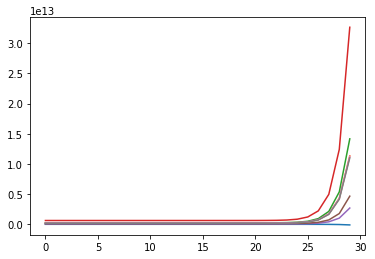

In [75]:
abX, abY = loadDataSet('data/abalone.txt')
ridgeweights = ridgeTest(abX, abY)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeweights)


## Lasso 回归： 
    * 使用绝对值代替平方和，可以增加解的稀疏性
    * sum(abs(Wi)) <= lambda

## 逐步前向回归：属于一种贪心算法，每一步都尽可能减少误差
    伪代码：
    * 数据标准化，使其满足0均值和单位方差
    * 在每轮迭代过程中：
        设置当前最小误差lowestError为正无穷
        对每个特征：
            增大或减小：
                改变一个系数得到一个新的W
                计算新W下的误差
                如果误差Error小于当前最小误差lowestError：
                    设置Wbest为当前的W
            将W设置为新的Wbest
                

In [82]:
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    '''输入：数据，预测值，迭代步长，迭代次数'''
    xMat = mat(xArr); yMat = mat(yArr).T                               #数据归一化
    yMean = mean(yMat, 0)
    yMat = yMat-yMean
    
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)
    xMat = (xMat-xMeans) / xVar
    
    m,n = shape(xMat)                                                  #获取数据个数，特征个数
    returnMat = zeros((numIt,n))                                       #初始化返回矩阵，存储了每次迭代过程中每个特征的权重
    ws = zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()           #初始化权重并复制了两个副本
    for i in range(numIt):                           #对每一次迭代，只会有一个权重发生改变
        #print(ws.T)                                  #打印权重
        lowestError = inf;                           #设初始误差为无穷大
        for j in range(n):                           #对每一个特征
            for sign in [-1,1]:                      #进行减小或增大，计算其预测误差，取计算误差小的权重为最好的权重。
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat                

In [84]:
xArr, yArr = loadDataSet('data/abalone.txt')
stageWise(xArr,yArr,0.01,200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])